In [2]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Data analytics/dataset for assignment 2.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,User ID,Gender,Age,Activity Level,Location,App Sessions,Distance Travelled (km),Calories Burned
0,1,Female,22,Active,Suburban,151,140,728
1,2,Male,50,Active,Rural,157,115,523
2,3,Male,36,Active,Urban,178,163,795
3,4,Female,36,Active,Suburban,155,85,715
4,5,Male,34,Sedentary,Rural,95,71,439


In [3]:
# Check for missing values
missing_values = data.isnull().sum()

# Check data types
data_types = data.dtypes

missing_values, data_types


(User ID                    0
 Gender                     0
 Age                        0
 Activity Level             0
 Location                   0
 App Sessions               0
 Distance Travelled (km)    0
 Calories Burned            0
 dtype: int64,
 User ID                     int64
 Gender                     object
 Age                         int64
 Activity Level             object
 Location                   object
 App Sessions                int64
 Distance Travelled (km)     int64
 Calories Burned             int64
 dtype: object)

In [4]:
# Generate descriptive statistics for numerical columns
descriptive_stats = data.describe()

descriptive_stats


,User ID,Age,App Sessions,Distance Travelled (km),Calories Burned
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,38.423600,124.366400,92.550400,432.316000
std,1443.520003,12.160631,42.689317,36.746095,187.427426
min,1.000000,18.000000,50.000000,26.000000,102.000000
25%,1250.750000,28.000000,89.000000,63.000000,285.000000
50%,2500.500000,39.000000,124.000000,89.000000,406.000000
75%,3750.250000,49.000000,161.000000,118.000000,560.000000
max,5000.000000,59.000000,199.000000,195.000000,987.000000


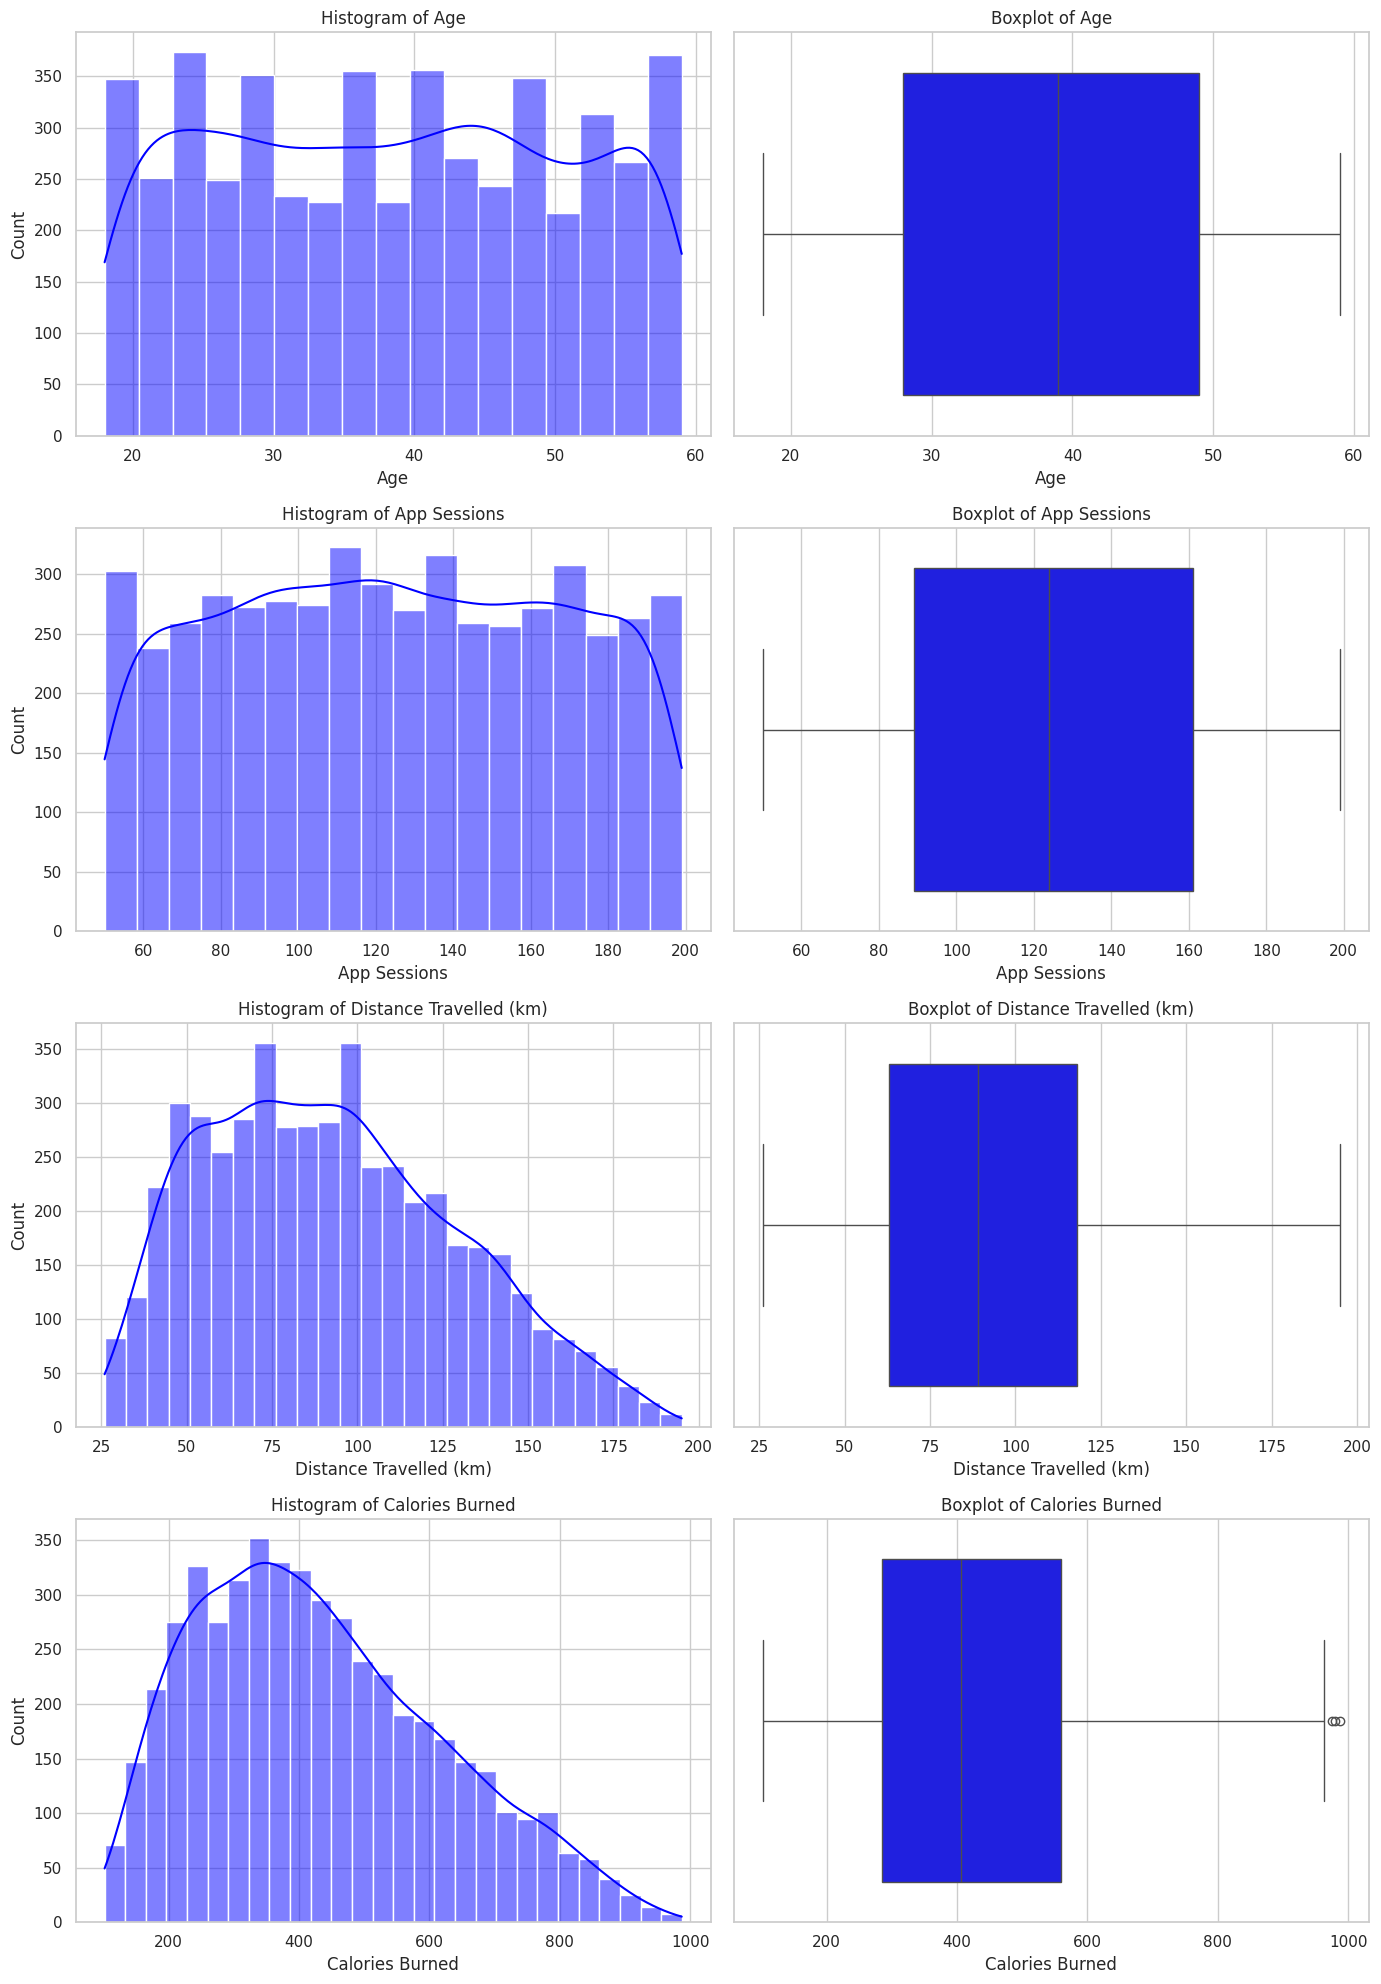

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
numerical_columns = ['Age', 'App Sessions', 'Distance Travelled (km)', 'Calories Burned']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 20))

for i, column in enumerate(numerical_columns):
    sns.histplot(data[column], kde=True, ax=axes[i][0], color='blue')
    axes[i][0].set_title(f'Histogram of {column}')

    sns.boxplot(x=data[column], ax=axes[i][1], color='blue')
    axes[i][1].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


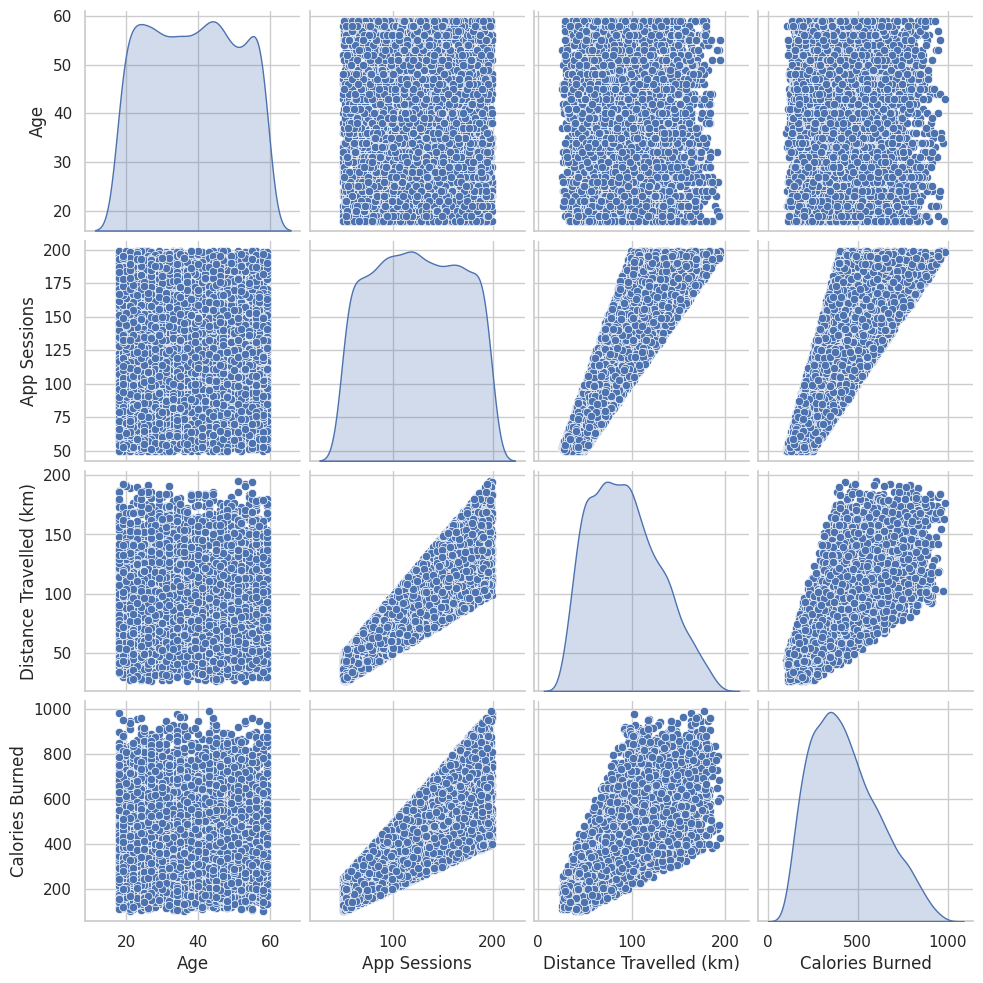

In [6]:
sns.pairplot(data[['Age', 'App Sessions', 'Distance Travelled (km)', 'Calories Burned']], diag_kind='kde')
plt.show()


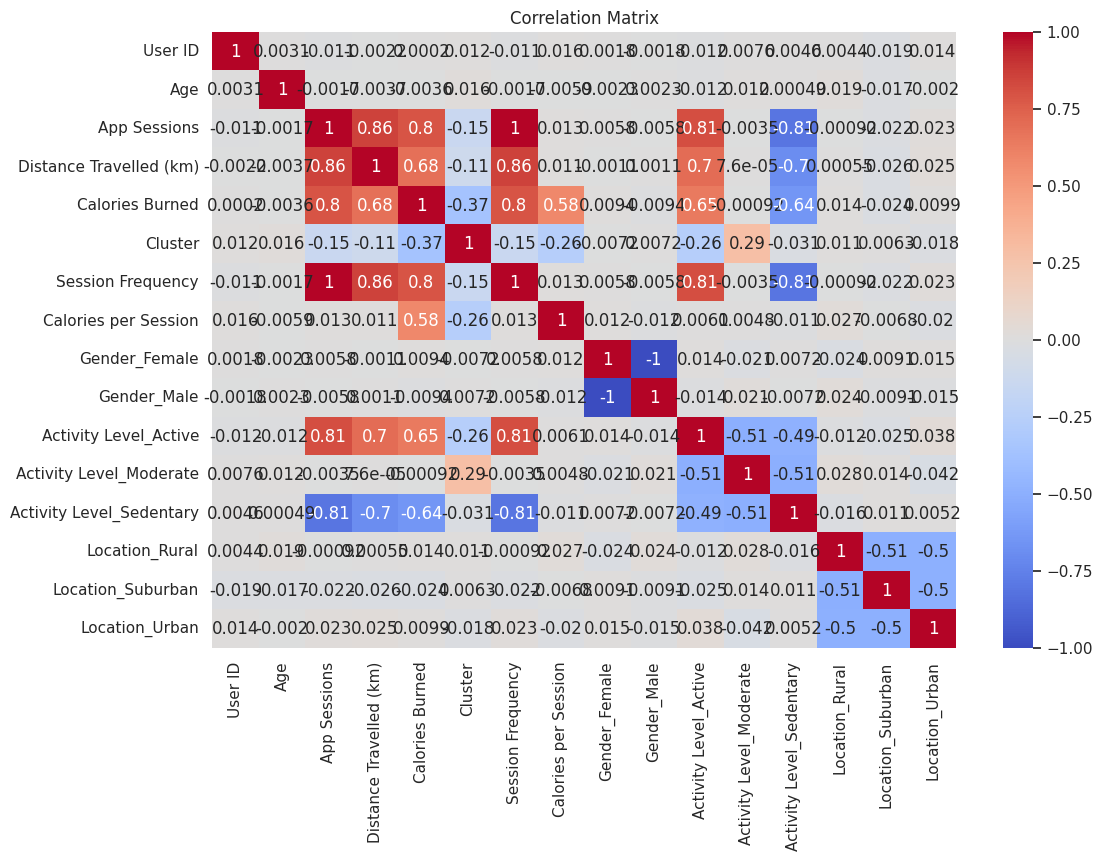

In [14]:
# Encode categorical variables for correlation analysis
data_encoded = pd.get_dummies(data, columns=['Gender', 'Activity Level', 'Location'])

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

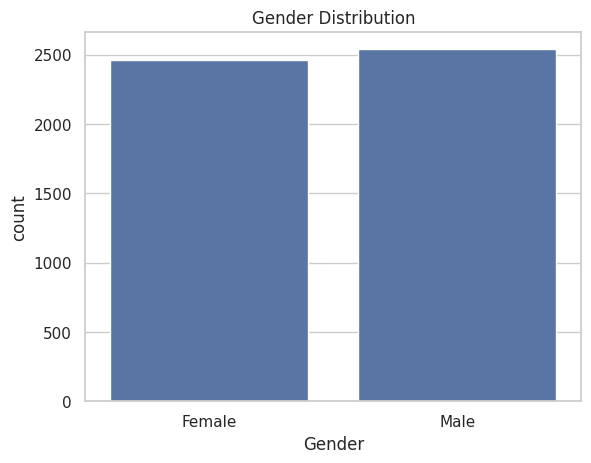

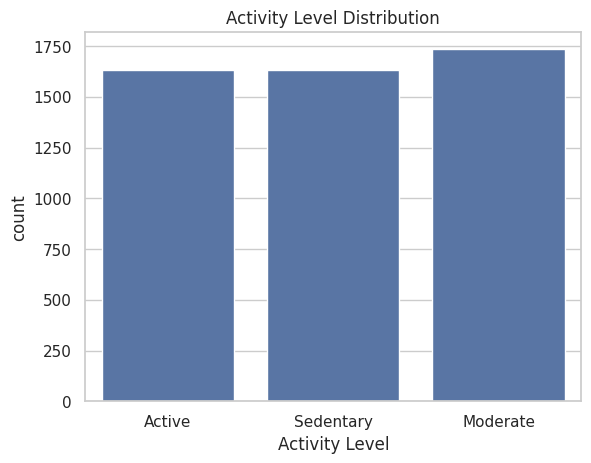

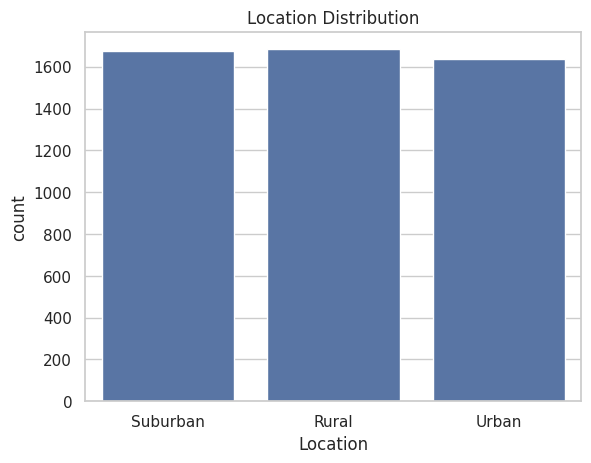

In [7]:
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.show()

sns.countplot(x='Activity Level', data=data)
plt.title('Activity Level Distribution')
plt.show()

sns.countplot(x='Location', data=data)
plt.title('Location Distribution')
plt.show()


In [8]:
import statsmodels.api as sm

X = data[['Age', 'App Sessions', 'Distance Travelled (km)']]
y = data['Calories Burned']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        Calories Burned   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     2868.
Date:                Tue, 09 Jul 2024   Prob (F-statistic):               0.00
Time:                        03:23:47   Log-Likelihood:                -30757.
No. Observations:                5000   AIC:                         6.152e+04
Df Residuals:                    4996   BIC:                         6.155e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


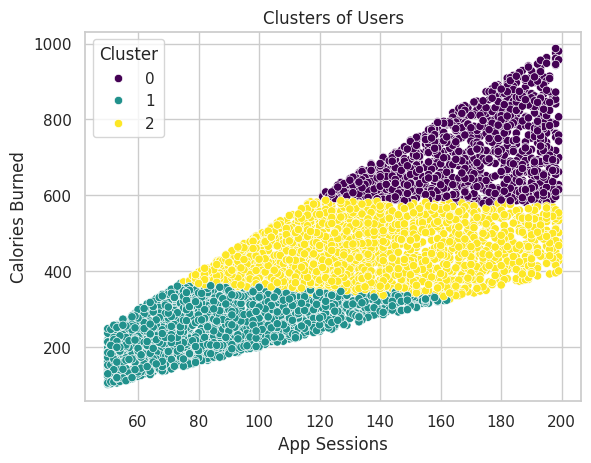

In [9]:
from sklearn.cluster import KMeans

features = data[['Age', 'App Sessions', 'Distance Travelled (km)', 'Calories Burned']]
kmeans = KMeans(n_clusters=3, random_state=42).fit(features)
data['Cluster'] = kmeans.labels_

sns.scatterplot(x='App Sessions', y='Calories Burned', hue='Cluster', data=data, palette='viridis')
plt.title('Clusters of Users')
plt.show()


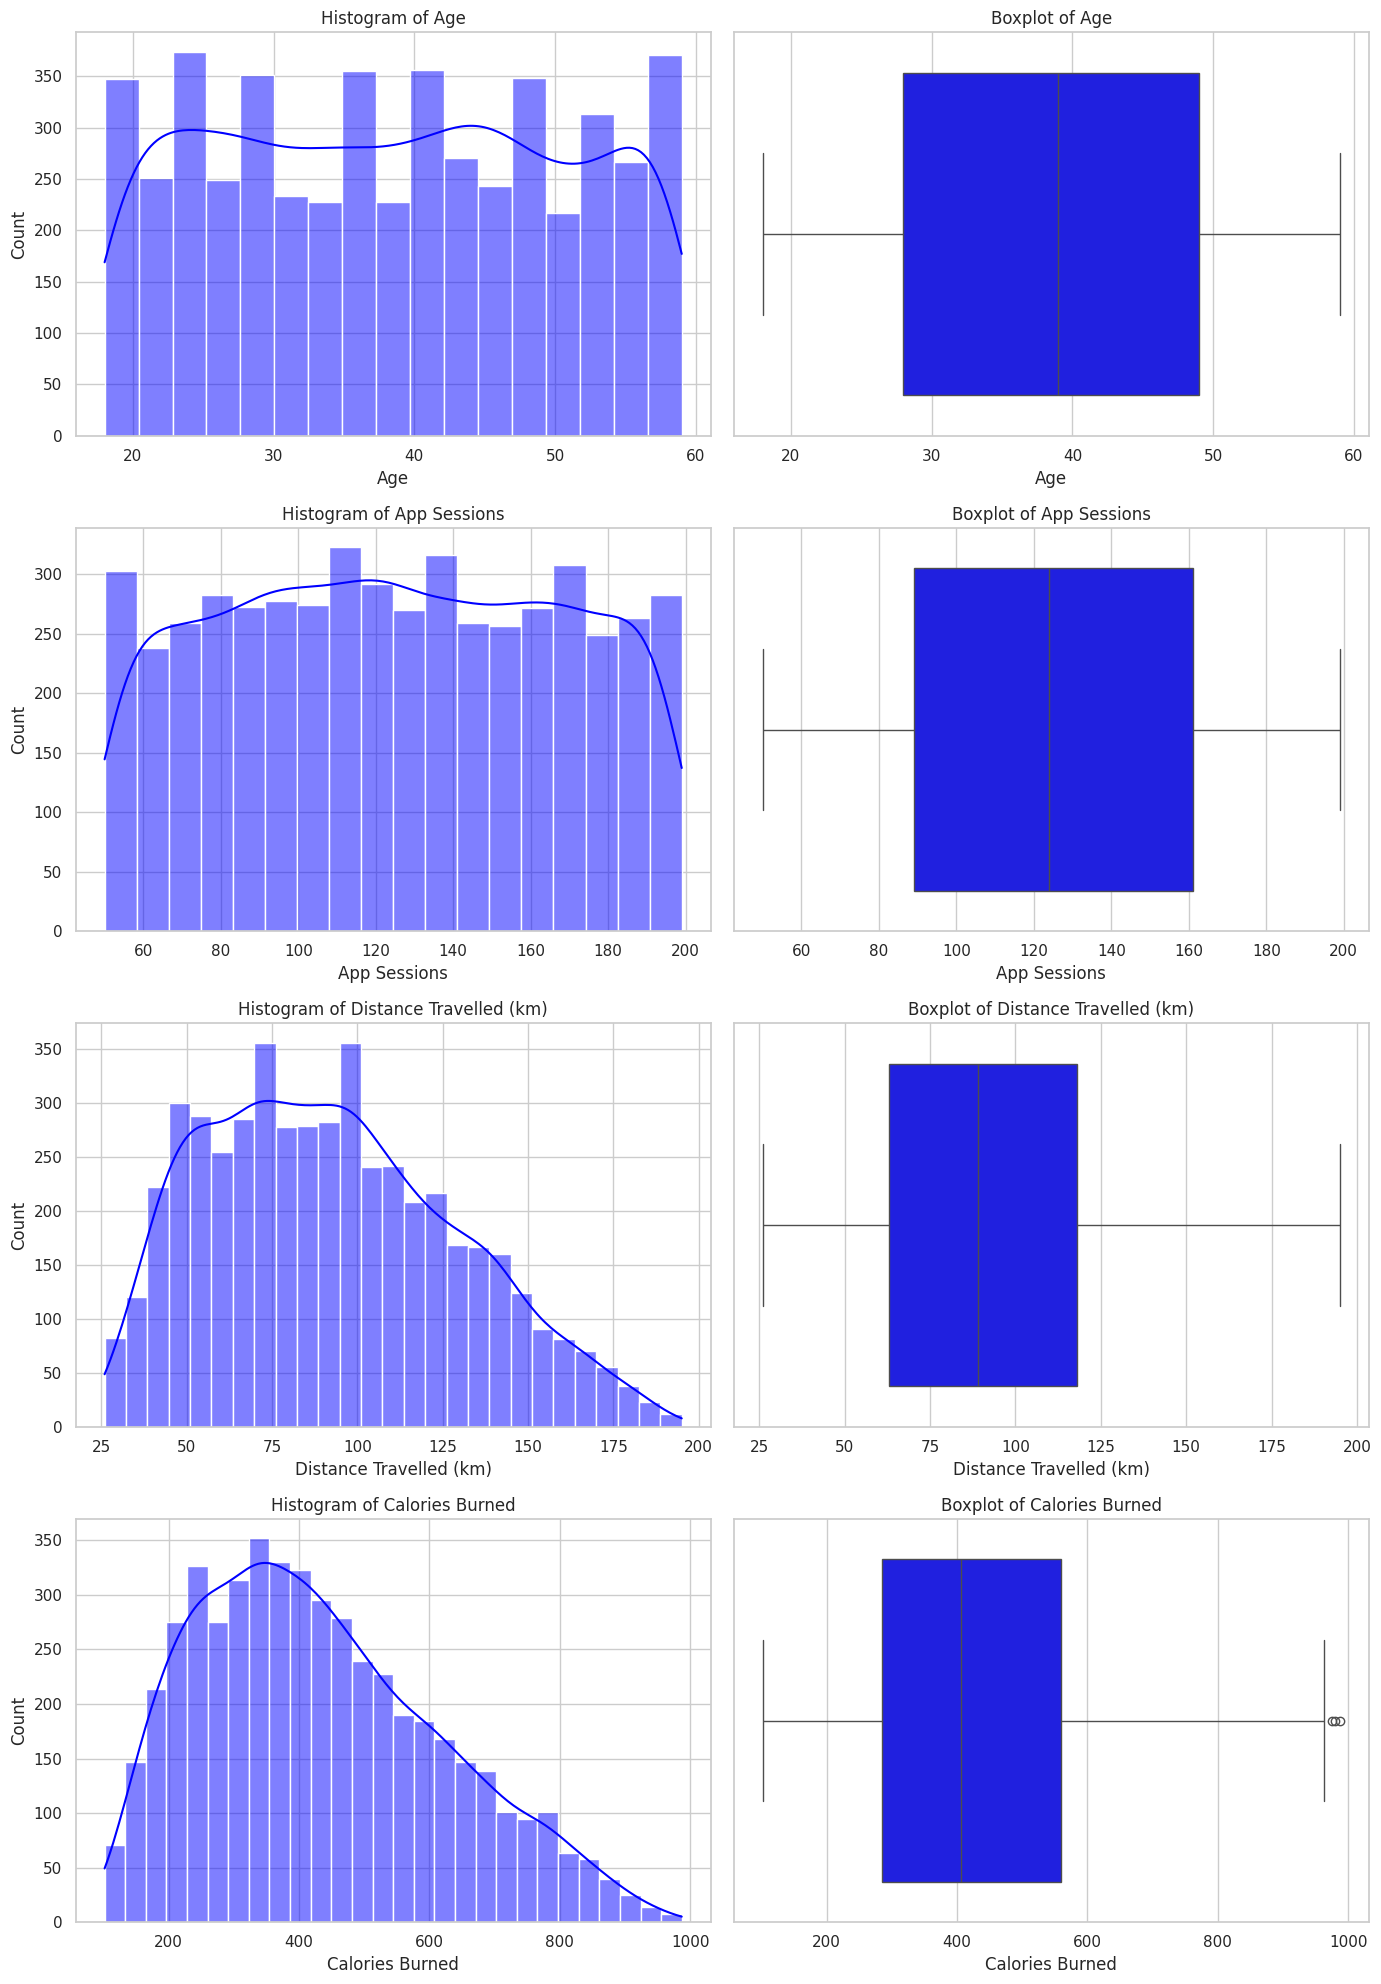

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# List of numerical columns
numerical_columns = ['Age', 'App Sessions', 'Distance Travelled (km)', 'Calories Burned']

# Create histograms and boxplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 20))

for i, column in enumerate(numerical_columns):
    sns.histplot(data[column], kde=True, ax=axes[i][0], color='blue')
    axes[i][0].set_title(f'Histogram of {column}')

    sns.boxplot(x=data[column], ax=axes[i][1], color='blue')
    axes[i][1].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


In [11]:
data['Session Frequency'] = data['App Sessions'] / 365  # Assuming data is for one year
data['Calories per Session'] = data['Calories Burned'] / data['App Sessions']


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = data[['Age', 'App Sessions', 'Distance Travelled (km)', 'Session Frequency', 'Calories per Session']]
y = data['Calories Burned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 1377.227249217883


In [13]:
from sklearn.metrics import silhouette_score

features = data[['Age', 'App Sessions', 'Distance Travelled (km)', 'Calories Burned']]
kmeans = KMeans(n_clusters=3, random_state=42).fit(features)
labels = kmeans.labels_

sil_score = silhouette_score(features, labels)
print(f'Silhouette Score: {sil_score}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.49062892383060724
